<font color=Pink size=3>In Swan, the default uproot is uproot3, the default awkward is awkward0</font><br>
<font color=Pink size=3>Here use awkward1 and uproot4, need to upgrade awkward and uproot first</font><br>

In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak

<font color=blue size=6>Private Production validation</font><br>
<font color=Green size=3>Input the aQGC NanoAOD file in first line</font><br>

In [2]:
events = uproot.open("/eos/user/q/qiguo/NanoAOD/test_file/RunIIAutumn18NanoAODv7/WWZ_ScaleST.root")["Events"]
events_ak = events.arrays( ['event',"LHEWeight_mg_reweighting"] , library="ak" )
events_arrow_table = ak.to_arrow_table(events_ak)
pdf = events_arrow_table.to_pandas()

In [3]:
def get_df_mg_reweighting_info(events,raws = (0,11)):
    import io
    df = pd.read_csv(io.StringIO(events["LHEWeight_mg_reweighting"].title.encode('utf-8').decode()), lineterminator=';', skiprows=1)
    df = df[raws[0]:raws[1]]
    df = df.style.set_properties(subset=['text'], **{'width': '600px'})
    pd.set_option('display.max_rows', None)
    return df


def Validate_Parabolic_Shape_of_weights(events, **kwargs):
    ## Validating parabolic shape of weights
    ## A quick check if the weights are really parabolic
    Events_num = kwargs.get('Events_num', 0)
    Parameter_Range_Default = { }
    Parameter_Range = kwargs.get('Parameter_Range', Parameter_Range_Default)
    Weight_Index_Default = { }
    Weight_Index = kwargs.get('Weight_Index', Weight_Index_Default)
    ylabel = kwargs.get('ylabel', "relative weight")
    xlabel_default = { }
    xlabel = kwargs.get('xlabel', xlabel_default)
    Subplots_Split = kwargs.get('Subplots_Split', [3,3])
    aQGC = kwargs.get('aQGC', ['FS0',])
    All_Events = kwargs.get('All_Events', False)
    SM_Index = kwargs.get('SM_Index', 121)
    
    plt.figure(figsize=(5*Subplots_Split[0],5*Subplots_Split[1]), dpi=100)
    

    for i,j in enumerate(aQGC):
        
        w = events["LHEWeight_mg_reweighting"][Events_num][Weight_Index[j][0]:Weight_Index[j][1]]
        
        sumw = []
        for k in range(Weight_Index[j][1]-Weight_Index[j][0]):
            events[j+'_'+str(k)] = (events["LHEWeight_mg_reweighting"]).map(lambda x: x[Weight_Index[j][0]+k])
            sumw.append(events[j+'_'+str(k)].sum())
        events["SM"] = (events["LHEWeight_mg_reweighting"]).map(lambda x: x[SM_Index])

        plt.subplot(Subplots_Split[0],Subplots_Split[1],i+1)
        if All_Events:
            plt.scatter(Parameter_Range[j], sumw)
        else:
            plt.scatter(Parameter_Range[j], w)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel[j])
        ax = plt.gca()
        plt.text( x=0.5, y=0.8, s=j,   rotation=1,  ha='center',  va='top',   fontdict=dict(fontsize=25, color='b', weight='bold'),  transform=ax.transAxes)
        
    plt.show()
    return events

<font color=Green size=4>WWW parameters</font><br>
<font color=Blue size=2>Parameter_Range : reweight grid</font><br>
<font color=Blue size=2>SM_Index : SM reweight is the last index</font><br>

In [4]:
Parameter_Range = {} ; Weight_Index = {}
Parameter_Range['FS0'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FS0'] = (0,12)
Parameter_Range['FS1'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FS1'] = (12,24)
Parameter_Range['FS2'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FS2'] = (24,36)
Parameter_Range['FM0'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM0'] = (36,48)
Parameter_Range['FM1'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM1'] = (48,60)
Parameter_Range['FM6'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM6'] = (60,72)
Parameter_Range['FM7'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM7'] = (72,84)
Parameter_Range['FT0'] = [-3,-1.5,-1.0,-0.8,-0.4,-0.2,0.2,0.4,0.8,1.0,1.5,3.0] ; Weight_Index['FT0'] = (84,96)
Parameter_Range['FT1'] = [-3,-1.5,-1.0,-0.8,-0.4,-0.2,0.2,0.4,0.8,1.0,1.5,3.0] ; Weight_Index['FT1'] = (96,108)
Parameter_Range['FT2'] = [-3,-1.5,-1.0,-0.8,-0.4,-0.2,0.2,0.4,0.8,1.0,1.5,3.0] ; Weight_Index['FT2'] = (96,108)
xlabel = {
        'FS0' : "$F_{S0}$ :  *10$^{3}$ $[$TeV$^{-4}]$",
        'FS1' : "$F_{S1}$ :  *10$^{3}$ $[$TeV$^{-4}]$",
        'FS2' : "$F_{S2}$ :  *10$^{3}$ $[$TeV$^{-4}]$",
        'FM0' : "$F_{M0}$ : $[$TeV$^{-4}]$",
        'FM1' : "$F_{M1}$ : $[$TeV$^{-4}]$",
        'FM6' : "$F_{M6}$ : $[$TeV$^{-4}]$",
        'FM7' : "$F_{M7}$ : $[$TeV$^{-4}]$",
        'FT0' : "$F_{T0}$ $[$TeV$^{-4}]$",
        'FT1' : "$F_{T1}$ $[$TeV$^{-4}]$",
        'FT2' : "$F_{T2}$ $[$TeV$^{-4}]$",
    }
Subplots_Split = (4,4)
aQGC = ['FS0', 'FS1', 'FS2', 'FM0', 'FM1', 'FM6', 'FM7', 'FT0', 'FT1', 'FT2']
SM_Index = 120

<font color=Green size=4>WWZ parameters</font><br>
<font color=Blue size=2>Parameter_Range : reweight grid</font><br>
<font color=Blue size=2>SM_Index : SM reweight is the last index</font><br>

In [5]:
Parameter_Range = {} ; Weight_Index = {}
Parameter_Range['FS0'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FS0'] = (0,12)
Parameter_Range['FS1'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FS1'] = (12,24)
Parameter_Range['FS2'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FS2'] = (24,36)
Parameter_Range['FM0'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM0'] = (36,48)
Parameter_Range['FM1'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM1'] = (48,60)
Parameter_Range['FM2'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM2'] = (60,72)
Parameter_Range['FM3'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM3'] = (72,84)
Parameter_Range['FM4'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM4'] = (84,96)
Parameter_Range['FM5'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM5'] = (96,108)
Parameter_Range['FM6'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM6'] = (108,120)
Parameter_Range['FM7'] = [-30,-15,-10,-8,-4,-2,2,4,8,10,15,30] ; Weight_Index['FM7'] = (120,132)
Parameter_Range['FT0'] = [-3,-1.5,-1.0,-0.8,-0.4,-0.2,0.2,0.4,0.8,1.0,1.5,3.0] ; Weight_Index['FT0'] = (132,144)
Parameter_Range['FT1'] = [-3,-1.5,-1.0,-0.8,-0.4,-0.2,0.2,0.4,0.8,1.0,1.5,3.0] ; Weight_Index['FT1'] = (144,156)
Parameter_Range['FT2'] = [-3,-1.5,-1.0,-0.8,-0.4,-0.2,0.2,0.4,0.8,1.0,1.5,3.0] ; Weight_Index['FT2'] = (156,168)
Parameter_Range['FT5'] = [-3,-1.5,-1.0,-0.8,-0.4,-0.2,0.2,0.4,0.8,1.0,1.5,3.0] ; Weight_Index['FT5'] = (168,180)
Parameter_Range['FT6'] = [-3,-1.5,-1.0,-0.8,-0.4,-0.2,0.2,0.4,0.8,1.0,1.5,3.0] ; Weight_Index['FT6'] = (180,192)
Parameter_Range['FT7'] = [-3,-1.5,-1.0,-0.8,-0.4,-0.2,0.2,0.4,0.8,1.0,1.5,3.0] ; Weight_Index['FT7'] = (192,204)

xlabel = {
        'FS0' : "$F_{S0}$ :  *10$^{3}$ $[$TeV$^{-4}]$",
        'FS1' : "$F_{S1}$ :  *10$^{3}$ $[$TeV$^{-4}]$",
        'FS2' : "$F_{S2}$ :  *10$^{3}$ $[$TeV$^{-4}]$",
        'FM0' : "$F_{M0}$ : $[$TeV$^{-4}]$",
        'FM1' : "$F_{M1}$ : $[$TeV$^{-4}]$",
        'FM2' : "$F_{M2}$ : $[$TeV$^{-4}]$",
        'FM3' : "$F_{M3}$ : $[$TeV$^{-4}]$",
        'FM4' : "$F_{M4}$ : $[$TeV$^{-4}]$",
        'FM5' : "$F_{M5}$ : $[$TeV$^{-4}]$",
        'FM6' : "$F_{M6}$ : $[$TeV$^{-4}]$",
        'FM7' : "$F_{M7}$ : $[$TeV$^{-4}]$",
        'FT0' : "$F_{T0}$ $[$TeV$^{-4}]$",
        'FT1' : "$F_{T1}$ $[$TeV$^{-4}]$",
        'FT2' : "$F_{T2}$ $[$TeV$^{-4}]$",
        'FT5' : "$F_{T5}$ $[$TeV$^{-4}]$",
        'FT6' : "$F_{T6}$ $[$TeV$^{-4}]$",
        'FT7' : "$F_{T7}$ $[$TeV$^{-4}]$",
    }
Subplots_Split = (6,6)
aQGC = ['FS0', 'FS1', 'FS2', 'FM0', 'FM1', 'FM2', 'FM3', 'FM4','FM5','FM6','FM7', 'FT0','FT1','FT2','FT5','FT6','FT7']
SM_Index = 204

<font color=Blue size=2>All_Events : if true, will use all the events, else, use one event</font><br>
<font color=Blue size=2>Events_num : event index</font><br>

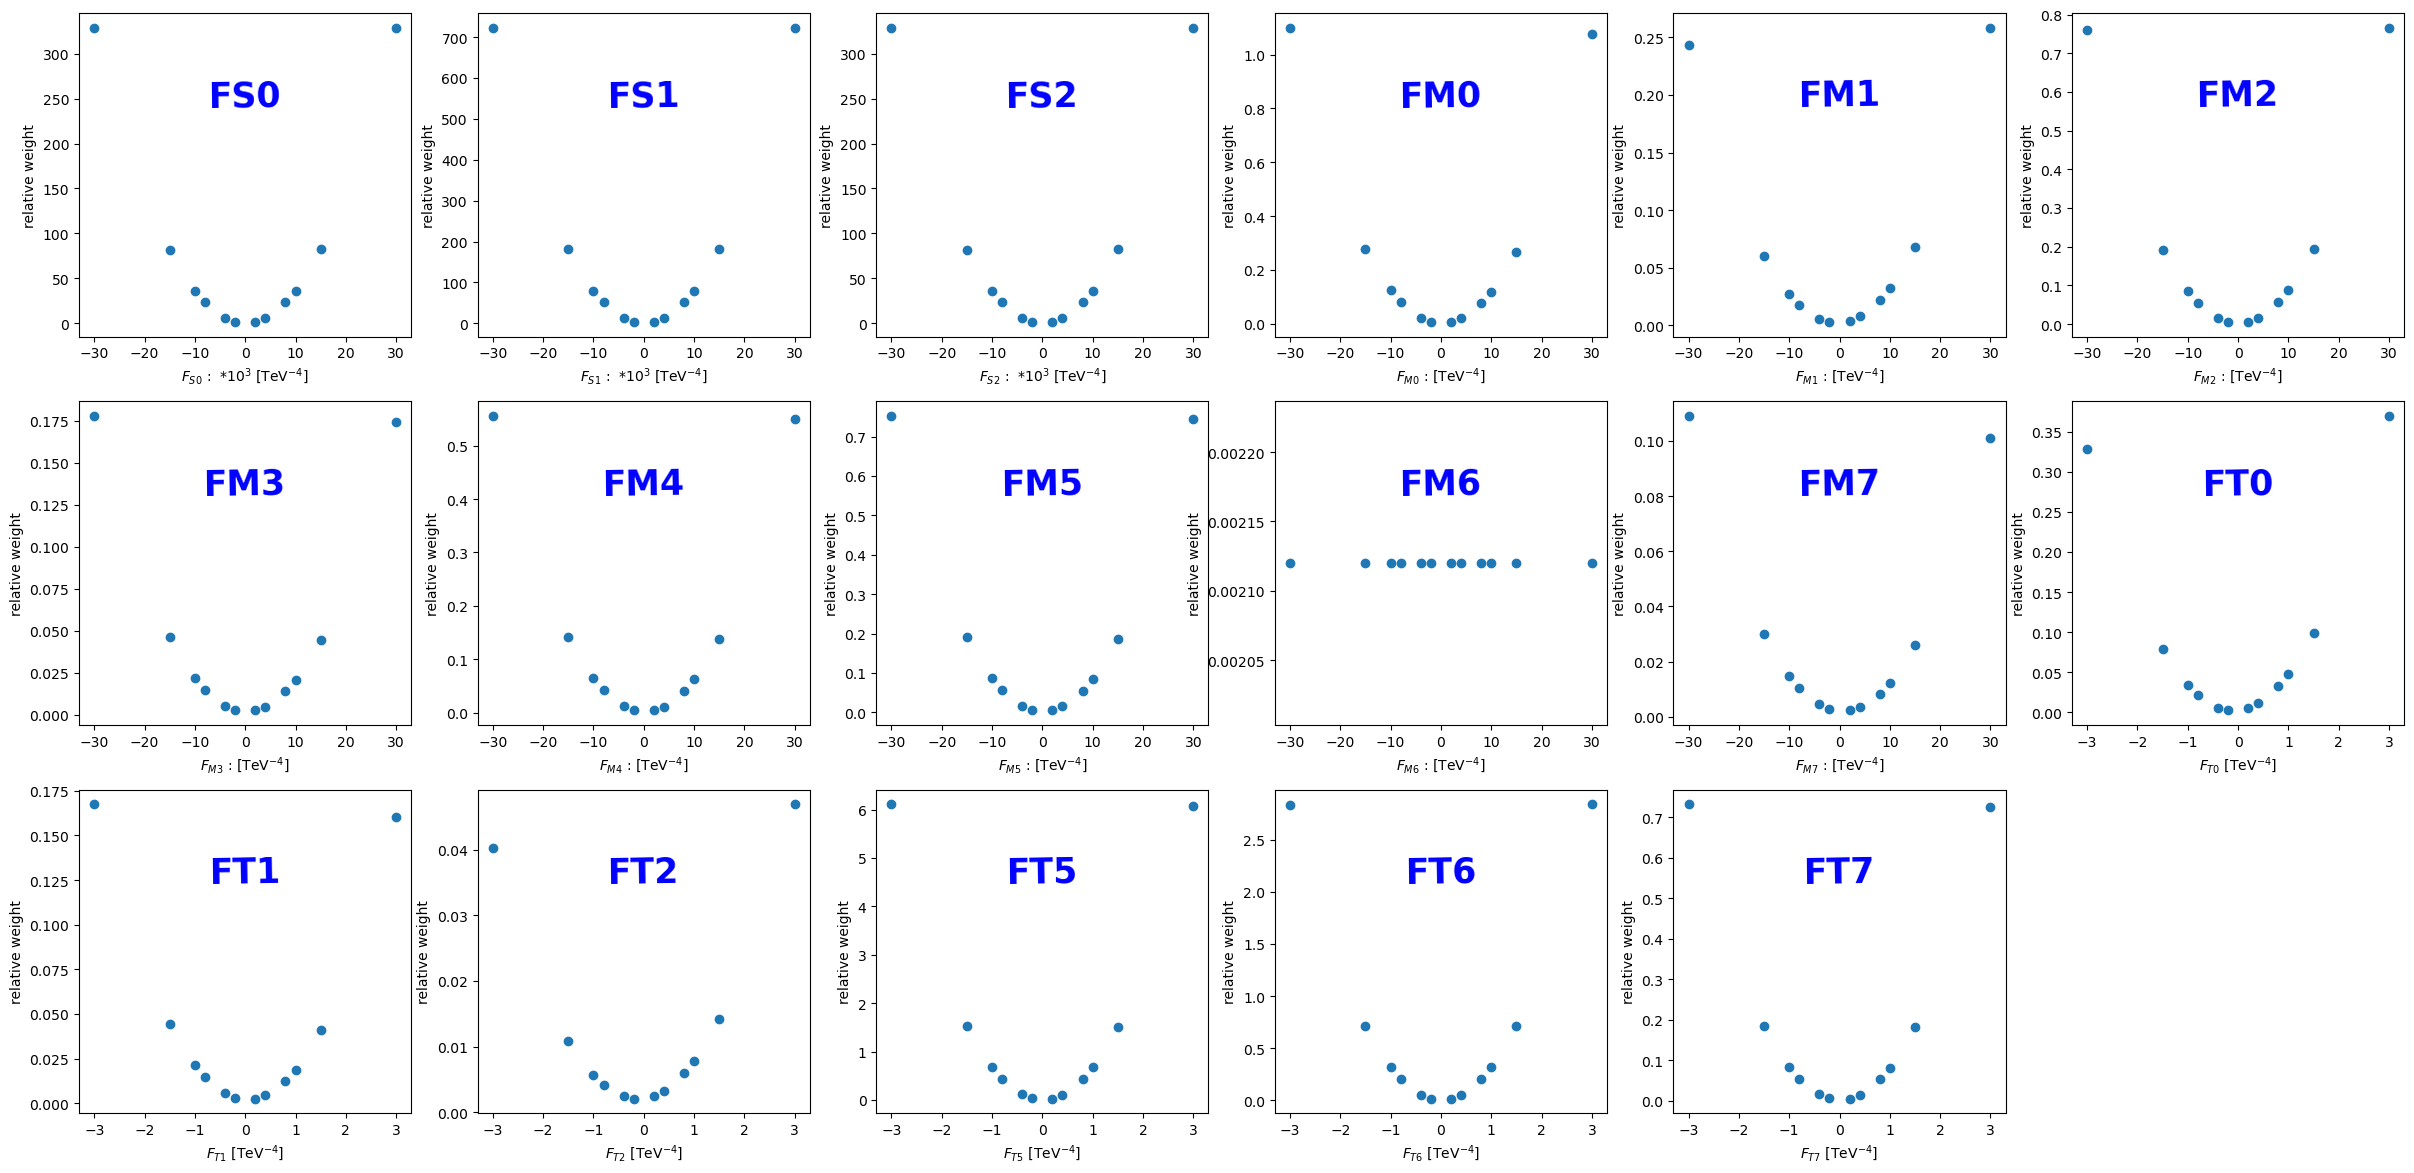

In [6]:
All_Events = False
Events_num = 5
# aQGC = ['FS0' ]
pdf2 = Validate_Parabolic_Shape_of_weights( pdf , Parameter_Range = Parameter_Range , Weight_Index = Weight_Index , Subplots_Split = Subplots_Split , aQGC = aQGC, Events_num = Events_num, All_Events = All_Events, xlabel = xlabel, SM_Index = SM_Index)

In [7]:
pdf[['SM']+['FM6_'+str(i) for i in range(12)]][0:5]

,SM,FM6_0,FM6_1,FM6_2,FM6_3,FM6_4,FM6_5,FM6_6,FM6_7,FM6_8,FM6_9,FM6_10,FM6_11
0,0.975637,0.975637,0.975637,0.975637,0.975637,0.975637,0.975637,0.975637,0.975637,0.975637,0.975637,0.975637,0.975637
1,1.019944,1.019944,1.019944,1.019944,1.019944,1.019944,1.019944,1.019944,1.019944,1.019944,1.019944,1.019944,1.019944
2,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044
3,1.062114,1.062114,1.062114,1.062114,1.062114,1.062114,1.062114,1.062114,1.062114,1.062114,1.062114,1.062114,1.062114
4,0.998594,0.998594,0.998594,0.998594,0.998594,0.998594,0.998594,0.998594,0.998594,0.998594,0.998594,0.998594,0.998594


<font color=Green size=4>display reweight grid info</font><br>

In [8]:
get_df_mg_reweighting_info(events, raws=(0,20))

,id,text
0,EFT__FS0_m30,set param_card anoinputs 1 -3e-08 # orig: 0.0 set param_card anoinputs 12 0.0 # orig: 5e-12
1,EFT__FS0_m15,set param_card anoinputs 1 -1.5e-08 # orig: 0.0 set param_card anoinputs 12 0.0 # orig: 5e-12
2,EFT__FS0_m10,set param_card anoinputs 1 -1e-08 # orig: 0.0 set param_card anoinputs 12 0.0 # orig: 5e-12
3,EFT__FS0_m8,set param_card anoinputs 1 -8e-09 # orig: 0.0 set param_card anoinputs 12 0.0 # orig: 5e-12
4,EFT__FS0_m4,set param_card anoinputs 1 -4e-09 # orig: 0.0 set param_card anoinputs 12 0.0 # orig: 5e-12
5,EFT__FS0_m2,set param_card anoinputs 1 -2e-09 # orig: 0.0 set param_card anoinputs 12 0.0 # orig: 5e-12
6,EFT__FS0_p2,set param_card anoinputs 1 2e-09 # orig: 0.0 set param_card anoinputs 12 0.0 # orig: 5e-12
7,EFT__FS0_p4,set param_card anoinputs 1 4e-09 # orig: 0.0 set param_card anoinputs 12 0.0 # orig: 5e-12
8,EFT__FS0_p8,set param_card anoinputs 1 8e-09 # orig: 0.0 set param_card anoinputs 12 0.0 # orig: 5e-12
9,EFT__FS0_p10,set param_card anoinputs 1 1e-08 # orig: 0.0 set param_card anoinputs 12 0.0 # orig: 5e-12
